In [1]:
import json
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


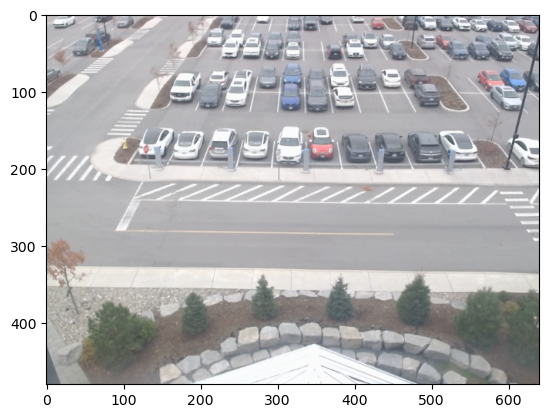

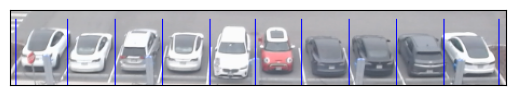

In [2]:
img = cv2.imread("usb_cam.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img = img[130:200, 110:570]

with open("coordinates_scaled.json", "r") as f:
    data = json.load(f)

img_mod = img.copy()
for x, count in data["x"]:
    cv2.line(img_mod, (x, data["y_min"]), (x, data["y_max"]), (255, 0, 0), 1)

plt.imshow(cv2.cvtColor(img_mod, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()


In [3]:
model = YOLO("yolov8n.pt")


In [4]:
results = model(img)



0: 128x640 10 cars, 66.0ms
Speed: 2.0ms preprocess, 66.0ms inference, 2.0ms postprocess per image at shape (1, 3, 128, 640)


In [5]:
results[0]


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [6]:
results[0].boxes


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
conf: tensor([0.6432, 0.6400, 0.5206, 0.4729, 0.4371, 0.4091, 0.3534, 0.3322, 0.2895, 0.2854])
data: tensor([[5.4940e+01, 2.1081e+01, 9.4860e+01, 5.8356e+01, 6.4323e-01, 2.0000e+00],
        [1.0405e+01, 1.6317e+01, 5.6543e+01, 6.6914e+01, 6.3998e-01, 2.0000e+00],
        [3.9981e+02, 2.0663e+01, 4.5214e+02, 6.8338e+01, 5.2057e-01, 2.0000e+00],
        [1.4340e+02, 2.1072e+01, 1.8030e+02, 5.7848e+01, 4.7291e-01, 2.0000e+00],
        [2.3192e+02, 1.6475e+01, 2.6408e+02, 5.9098e+01, 4.3708e-01, 2.0000e+00],
        [3.5734e+02, 2.1675e+01, 4.0507e+02, 6.7307e+01, 4.0906e-01, 2.0000e+00],
        [1.8628e+02, 1.5178e+01, 2.2348e+02, 6.4559e+01, 3.5344e-01, 2.0000e+00],
        [2.7289e+02, 2.4703e+01, 3.1401e+02, 6.3367e+01, 3.3225e-01, 2.0000e+00],
        [3.1343e+02, 2.3839e+01, 3.5671e+02, 6.8916e+01, 2.8952e-01, 2.0000e+00],
        [1.0056e+02, 1.7366e+01, 1.3929e+02, 6.03

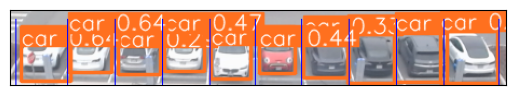

In [7]:
img_pred = results[0].plot()
for x, count in data["x"]:
    cv2.line(img_pred, (x, data["y_min"]), (x, data["y_max"]), (255, 0, 0), 1)

plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()


In [8]:
lots_occu = [False] * 10
r = results[0]
for i in range(len(r.boxes.cls)):
    clss = r.boxes.cls[i]
    xyxy = r.boxes.xyxy[i]
    # 2:car, 3:motorcycle, 5:bus, 7:truck
    if clss==2 or clss==3 or clss==5 or clss==7:
        for j in range(len(data["x"])-1):
            # if ((car cross left lot bound) or (car cross right lot bound) or (car within lot bound)) and (y direction in bound)
            if (xyxy[0] < data["x"][j][0] and data["x"][j][0] < xyxy[2] and (xyxy[2]-data["x"][j][0])/(data["x"][j+1][0]-data["x"][j][0]) > 0.8) \
                    or (xyxy[0] < data["x"][j+1][0] and data["x"][j+1][0] < xyxy[2] and (data["x"][j+1][0]-xyxy[0])/(data["x"][j+1][0]-data["x"][j][0]) > 0.8) \
                    or (data["x"][j][0] < xyxy[0] and xyxy[2] < data["x"][j+1][0]) \
                and (xyxy[3]-xyxy[1])/(data["y_max"]-data["y_min"]) > 0.5:
                # print((xyxy[3]-xyxy[1])/(data["y_max"]-data["y_min"]))
                lots_occu[j] = True
                break

lots_occu
    

[True, True, True, True, True, True, True, True, True, True]

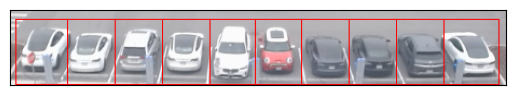

In [9]:
img_occu = img.copy()

for i in range(len(lots_occu)):
    if lots_occu[i] == True:
        cv2.rectangle(img_occu, (data["x"][i][0], data["y_min"]), (data["x"][i+1][0], data["y_max"]), (0, 0, 255), 1)
    else:
        cv2.rectangle(img_occu, (data["x"][i][0], data["y_min"]), (data["x"][i+1][0], data["y_max"]), (0, 255, 0), 1)

plt.imshow(cv2.cvtColor(img_occu, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()
